<a href="https://colab.research.google.com/github/tinumide/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

This project uses the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)



In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello welcome to google drive')
!cat /content/drive/My\ Drive/foo.txt

Hello welcome to google drive

In [0]:
import sys
sys.path.append('/content/drive/My Drive')

In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

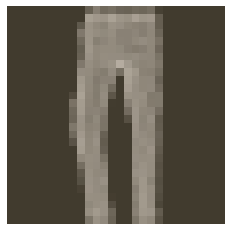

In [0]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Each image is 28x28 which is a total of 784 pixels, and there are 10 classes. 

In [0]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


# Train the network

In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [0]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss}")

Training loss: 481.07515919208527
Training loss: 369.87442894279957
Training loss: 330.86704977601767
Training loss: 307.25827130675316
Training loss: 293.3751781359315


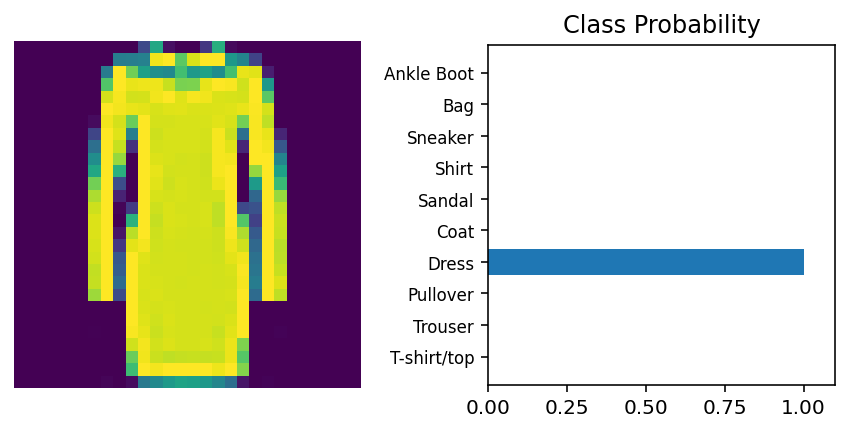

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper



dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Validation

In [0]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate
print(ps.shape)

torch.Size([64, 10])


In [0]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9],
        [9]])


In [0]:
equals = top_class == labels.view(*top_class.shape)

In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 10.9375%


In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        accuracy = 0
        with torch.no_grad():
            for images, labels in testloader:
                ps = torch.exp(model(images))
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
            print(f'Accuracy: {accuracy.item()/len(testloader)}')
        print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 0.8447452229299363
Accuracy: 13262.5%
Accuracy: 0.8556926751592356
Accuracy: 13434.375%
Accuracy: 0.857484076433121
Accuracy: 13462.5%
Accuracy: 0.8562898089171974
Accuracy: 13443.75%
Accuracy: 0.8596735668789809
Accuracy: 13496.875%
Accuracy: 0.8627587579617835
Accuracy: 13545.3125%
Accuracy: 0.8699243630573248
Accuracy: 13657.8125%
Accuracy: 0.8736066878980892
Accuracy: 13715.625%
Accuracy: 0.8663415605095541
Accuracy: 13601.5625%
Accuracy: 0.8722133757961783
Accuracy: 13693.75%
Accuracy: 0.8744028662420382
Accuracy: 13728.125%
Accuracy: 0.8745023885350318
Accuracy: 13729.6875%
Accuracy: 0.8687300955414012
Accuracy: 13639.0625%
Accuracy: 0.8802746815286624
Accuracy: 13820.3125%
Accuracy: 0.882265127388535
Accuracy: 13851.5625%
Accuracy: 0.8730095541401274
Accuracy: 13706.25%
Accuracy: 0.8767914012738853
Accuracy: 13765.625%
Accuracy: 0.8774880573248408
Accuracy: 13776.5625%
Accuracy: 0.8815684713375797
Accuracy: 13840.625%
Accuracy: 0.8777866242038217
Accuracy: 13781.25%
Ac

In [0]:
# Define model with dropout added
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [0]:
epochs = 30
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        logps = model.forward(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                ps = torch.exp(model.forward(images))
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()
        print(f'Accuracy : {(accuracy.item()/len(testloader))*100}')


Accuracy : 80.91162420382165
Accuracy : 82.95183121019109
Accuracy : 84.34514331210191
Accuracy : 84.81289808917197
Accuracy : 85.75835987261146
Accuracy : 86.2062101910828
Accuracy : 86.13654458598727
Accuracy : 86.44506369426752
Accuracy : 86.2062101910828
Accuracy : 86.53463375796179
Accuracy : 87.29100318471338
Accuracy : 87.42038216560509
Accuracy : 87.37062101910828
Accuracy : 87.30095541401273
Accuracy : 87.30095541401273
Accuracy : 87.93789808917197
Accuracy : 88.19665605095541
Accuracy : 87.93789808917197
Accuracy : 87.98765923566879
Accuracy : 88.40565286624204
Accuracy : 88.1170382165605
Accuracy : 88.55493630573248
Accuracy : 88.42555732484077
Accuracy : 88.72412420382165
Accuracy : 88.51512738853503
Accuracy : 88.75398089171973
Accuracy : 88.42555732484077
Accuracy : 88.70421974522293
Accuracy : 88.59474522292994
Accuracy : 88.61464968152866


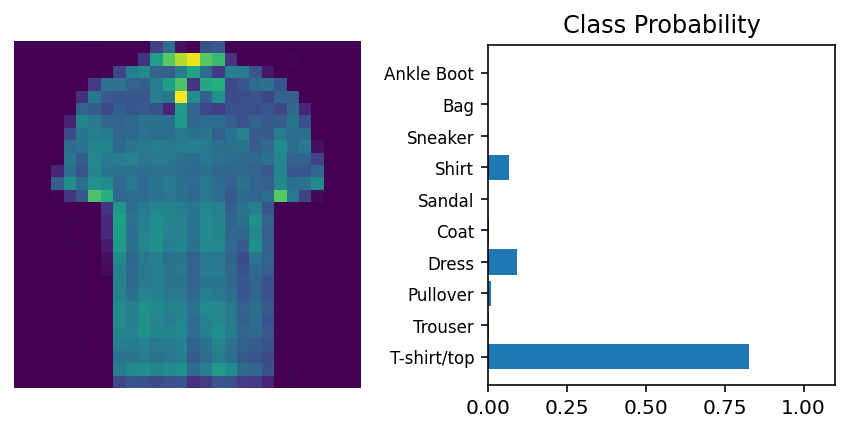

In [0]:
import helper


model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')